# 📊 About the Dataset

This dataset contains information about **customers** who purchase clothes online. The store offers **in-store style and clothing advice sessions**.

Customers visit the store, participate in sessions/meetings with a **personal stylist**, and then they can go home and order the clothes they want via a **mobile app** or a **website**.

> **Company's Goal**:  
> The company is trying to decide whether to focus its efforts on the mobile app experience or the website experience.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
from encodings.aliases import aliases

aliases_values = set(aliases.values())

for encoding in aliases_values:
    try:
        data = pd.read_csv(r"C:\Users\Anass\OneDrive\Desktop\Ecommerce Customers.csv", encoding = encoding)
        print("Encoder correct c'est : ",encoding)
    except:
        pass

Encoder correct c'est :  mac_greek
Encoder correct c'est :  cp860
Encoder correct c'est :  euc_jis_2004
Encoder correct c'est :  cp1255
Encoder correct c'est :  iso8859_8
Encoder correct c'est :  tis_620
Encoder correct c'est :  cp1256
Encoder correct c'est :  iso8859_4
Encoder correct c'est :  cp950
Encoder correct c'est :  mac_iceland
Encoder correct c'est :  mac_cyrillic
Encoder correct c'est :  cp1254
Encoder correct c'est :  cp855
Encoder correct c'est :  mbcs
Encoder correct c'est :  ascii
Encoder correct c'est :  cp1125
Encoder correct c'est :  iso8859_3
Encoder correct c'est :  big5
Encoder correct c'est :  cp866
Encoder correct c'est :  mac_turkish
Encoder correct c'est :  utf_8
Encoder correct c'est :  kz1048
Encoder correct c'est :  shift_jis_2004
Encoder correct c'est :  mac_roman
Encoder correct c'est :  cp1257
Encoder correct c'est :  utf_16_be
Encoder correct c'est :  euc_kr
Encoder correct c'est :  ptcp154
Encoder correct c'est :  euc_jisx0213
Encoder correct c'est :  c

In [7]:
data = pd.read_csv(r'C:\Users\Anass\OneDrive\Desktop\Ecommerce Customers.csv')

In [8]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
data.shape

(500, 8)

In [12]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Variables and Interpretations

1. **Avg. Session Length**
    * **Mean**: 33.05 minutes
    * **Std**: 0.99 minutes
    * **Min**: 29.53 minutes
    * **25%**: 32.34 minutes
    * **50%**: 33.08 minutes
    * **75%**: 33.71 minutes
    * **Max**: 36.14 minutes

    **Interpretation**: The average session length is around 33 minutes. The low variability around this mean indicates that the session durations are relatively stable. The minimum and maximum values show slight variability, but overall, clients spend a fairly consistent amount of time in each session.

2. **Time on App**
    * **Mean**: 12.05 minutes
    * **Std**: 0.99 minutes
    * **Min**: 8.51 minutes
    * **25%**: 11.39 minutes
    * **50%**: 11.98 minutes
    * **75%**: 12.75 minutes
    * **Max**: 15.13 minutes

    **Interpretation**: On average, clients spend about 12 minutes on the mobile app. Similar to session length, the time spent on the app is quite consistent with low variability. Clients typically spend between 8.5 and 15 minutes on the app.

3. **Time on Website**
    * **Mean**: 37.06 minutes
    * **Std**: 1.01 minutes
    * **Min**: 33.91 minutes
    * **25%**: 36.35 minutes
    * **50%**: 37.07 minutes
    * **75%**: 37.72 minutes
    * **Max**: 40.01 minutes

    **Interpretation**: Clients spend an average of 37 minutes on the website, which is significantly longer than the time spent on the mobile app. The low variability suggests that clients spend a relatively uniform amount of time on the website.

4. **Length of Membership**
    * **Mean**: 3.53 years
    * **Std**: 0.99 years
    * **Min**: 0.27 years
    * **25%**: 2.93 years
    * **50%**: 3.53 years
    * **75%**: 4.13 years
    * **Max**: 6.92 years

    **Interpretation**: The average membership length is about 3.5 years, with some variability. Clients have generally been members for between 0.3 and 7 years. The data show that most clients have been members for several years.

5. **Yearly Amount Spent**
    * **Mean**: 499.31 USD
    * **Std**: 79.31 USD
    * **Min**: 256.67 USD
    * **25%**: 445.04 USD
    * **50%**: 498.89 USD
    * **75%**: 549.31 USD
    * **Max**: 765.52 USD

    **Interpretation**: Clients spend an average of about 499 USD per year, with some variability. Annual spending ranges from 256 USD to 765 USD. Most clients spend between 445 USD and 549 USD per year.


In [13]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [19]:
data.groupby(data.duplicated()).size()

False    500
dtype: int64

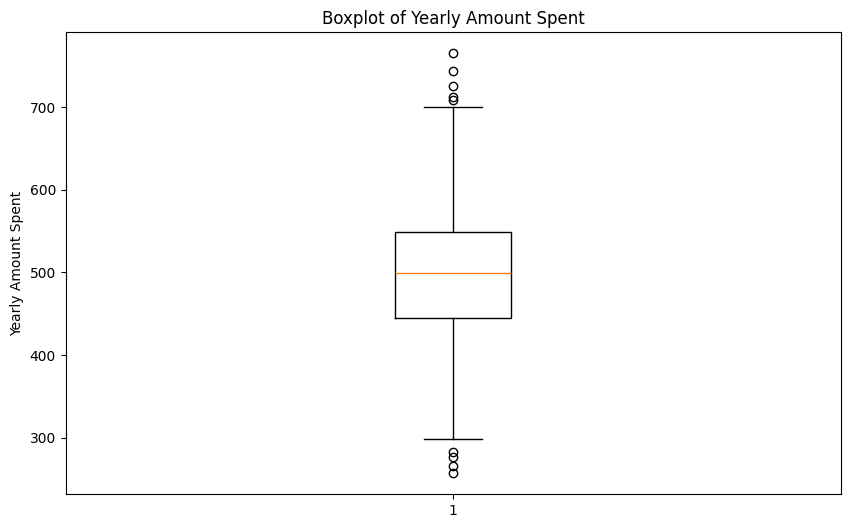

In [23]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Yearly Amount Spent'])
plt.title('Boxplot of Yearly Amount Spent')
plt.ylabel('Yearly Amount Spent')
plt.show()


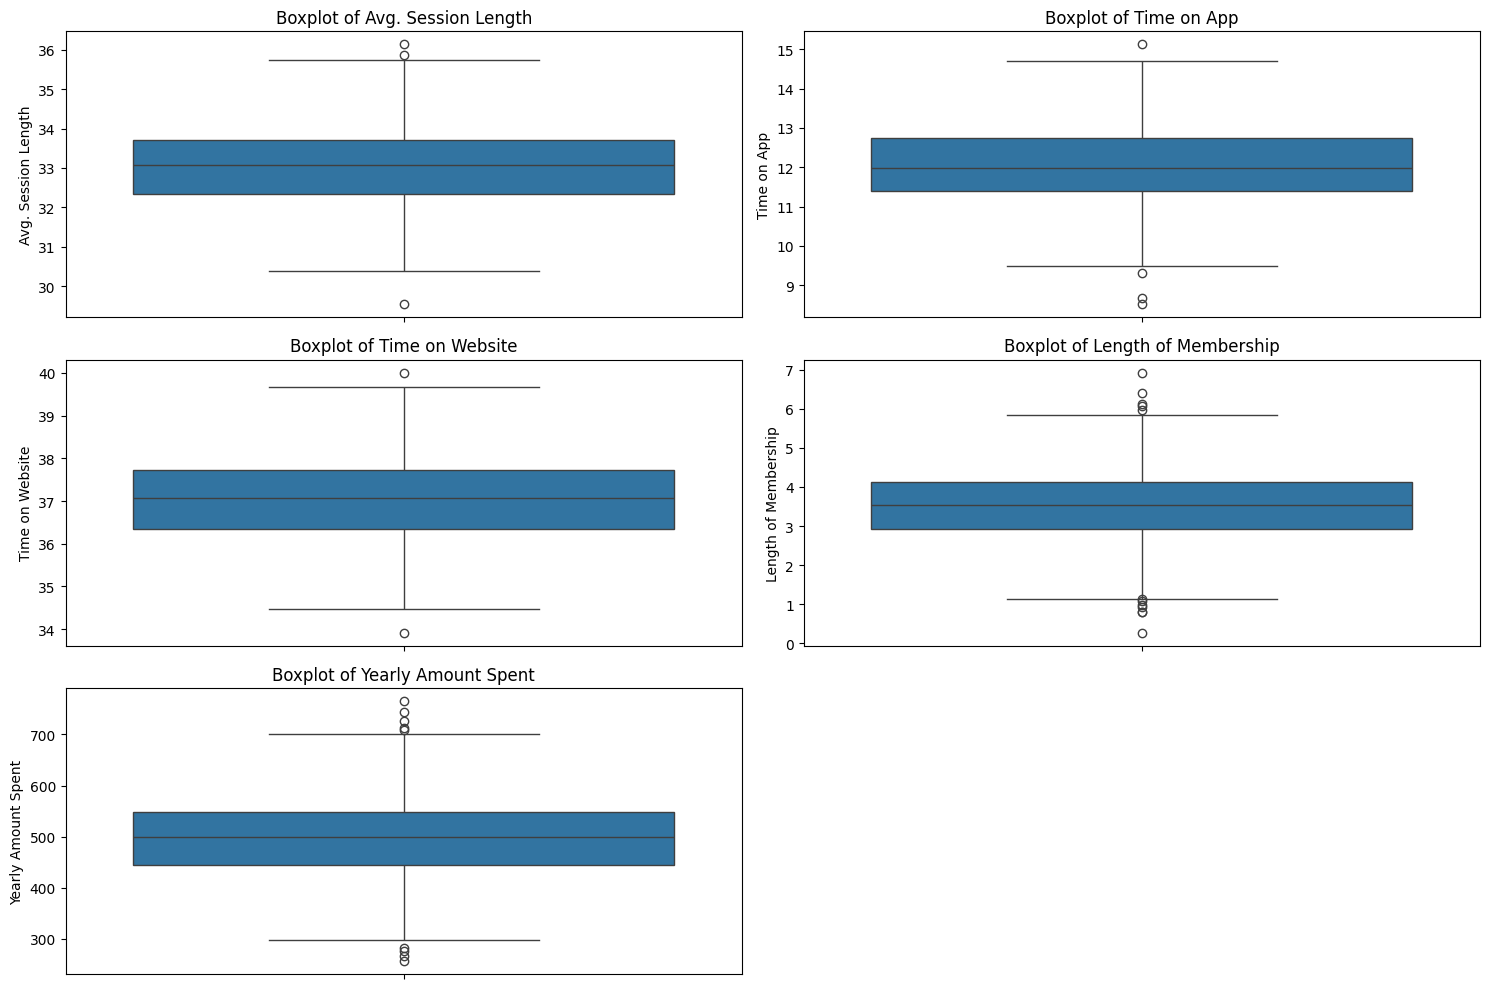

In [29]:
# Tracer un boxplot pour chaque colonne
import seaborn as sns
# Liste des colonnes à vérifier pour les valeurs aberrantes
colonnes = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

# Tracer un boxplot pour chaque colonne
plt.figure(figsize=(15, 10))
for i, colonne in enumerate(colonnes, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[colonne])
    plt.title(f'Boxplot of {colonne}')
    plt.ylabel(colonne)

plt.tight_layout()
plt.show()

In [ ]:
data.columns